In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
%matplotlib inline

In [3]:
transactions = pd.read_csv("exp01.csv",skiprows=1,sep=";")

In [4]:
transactions.describe()

,time,transaction,price,volume
count,34725.000000,34725.000000,34725.000000,34725.000000
mean,30830.320893,17363.000000,104.618530,32.584161
std,17251.561735,10024.388385,0.674358,29.457473
min,1.000000,1.000000,95.230000,1.000000
25%,16102.000000,8682.000000,104.600000,5.000000
50%,31197.000000,17363.000000,104.840000,25.000000
75%,45827.000000,26044.000000,104.940000,55.000000
max,59997.000000,34725.000000,105.000000,100.000000


In [5]:
#Convert time to days
transactions.loc[:,'time'] //= 200

In [6]:
df = transactions[['time','price','volume']]

In [7]:
#Convert it to "long-form" or "tidy" representation
df = pd.melt(df, id_vars=["time"], var_name="condition")

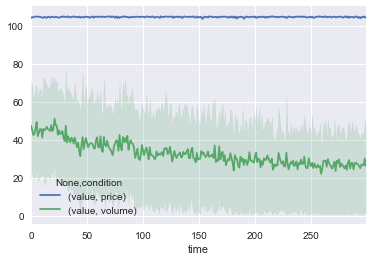

In [8]:
# Plot the average value by condition and date
ax = df.groupby(["condition", "time"]).mean().unstack("condition").plot()
# Get a reference to the x-points corresponding to the dates and the the colors
x = np.arange(len(df.time.unique()))
palette = sns.color_palette()

# Calculate the 25th and 75th percentiles of the data
# and plot a translucent band between them
for cond, cond_df in df.groupby("condition"):
    low = cond_df.groupby("time").value.apply(np.percentile, 25)
    high = cond_df.groupby("time").value.apply(np.percentile, 75)
    ax.fill_between(x, low, high, alpha=.2, color=palette.pop(0))
